## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [26]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,FunctionTransformer
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('gemstone.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     -------------------------------------- 109.0/109.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/359.5 kB ? eta -:--:--
   --------------------------------------  358.4/359.5 kB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 359.5/359.5 kB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ---------------------------------------- 296.5/296.5 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/667.1 kB ? eta -:--:--
   ------------------------------------- - 634.9/667.1 kB 20.1 MB/s eta 0:00:01
   --------------------------------------- 667.1/667.1 kB 14.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/409.6 kB ? eta -:--:--
   --------------------------------------- 409.6/409.6 kB 25.

DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\aiofiles-23.2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\anyio-3.7.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\boto3-1.26.105-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anac

In [9]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
## No missing values present in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.duplicated().sum()

0

In [ ]:
# No dublicated data present in the dataset

In [14]:
df.drop(labels=['id'],axis=1,inplace=True)

In [15]:
# numerical col and catagorical col
num_col=df.columns[df.dtypes!='object']
cat_col=df.columns[df.dtypes=='object']


In [16]:
num_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [17]:
cat_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [18]:
df[cat_col].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [19]:
print(df['cut'].value_counts()," \n",df['color'].value_counts(),"\n ",df['clarity'].value_counts())

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64  
 color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64 
  clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64


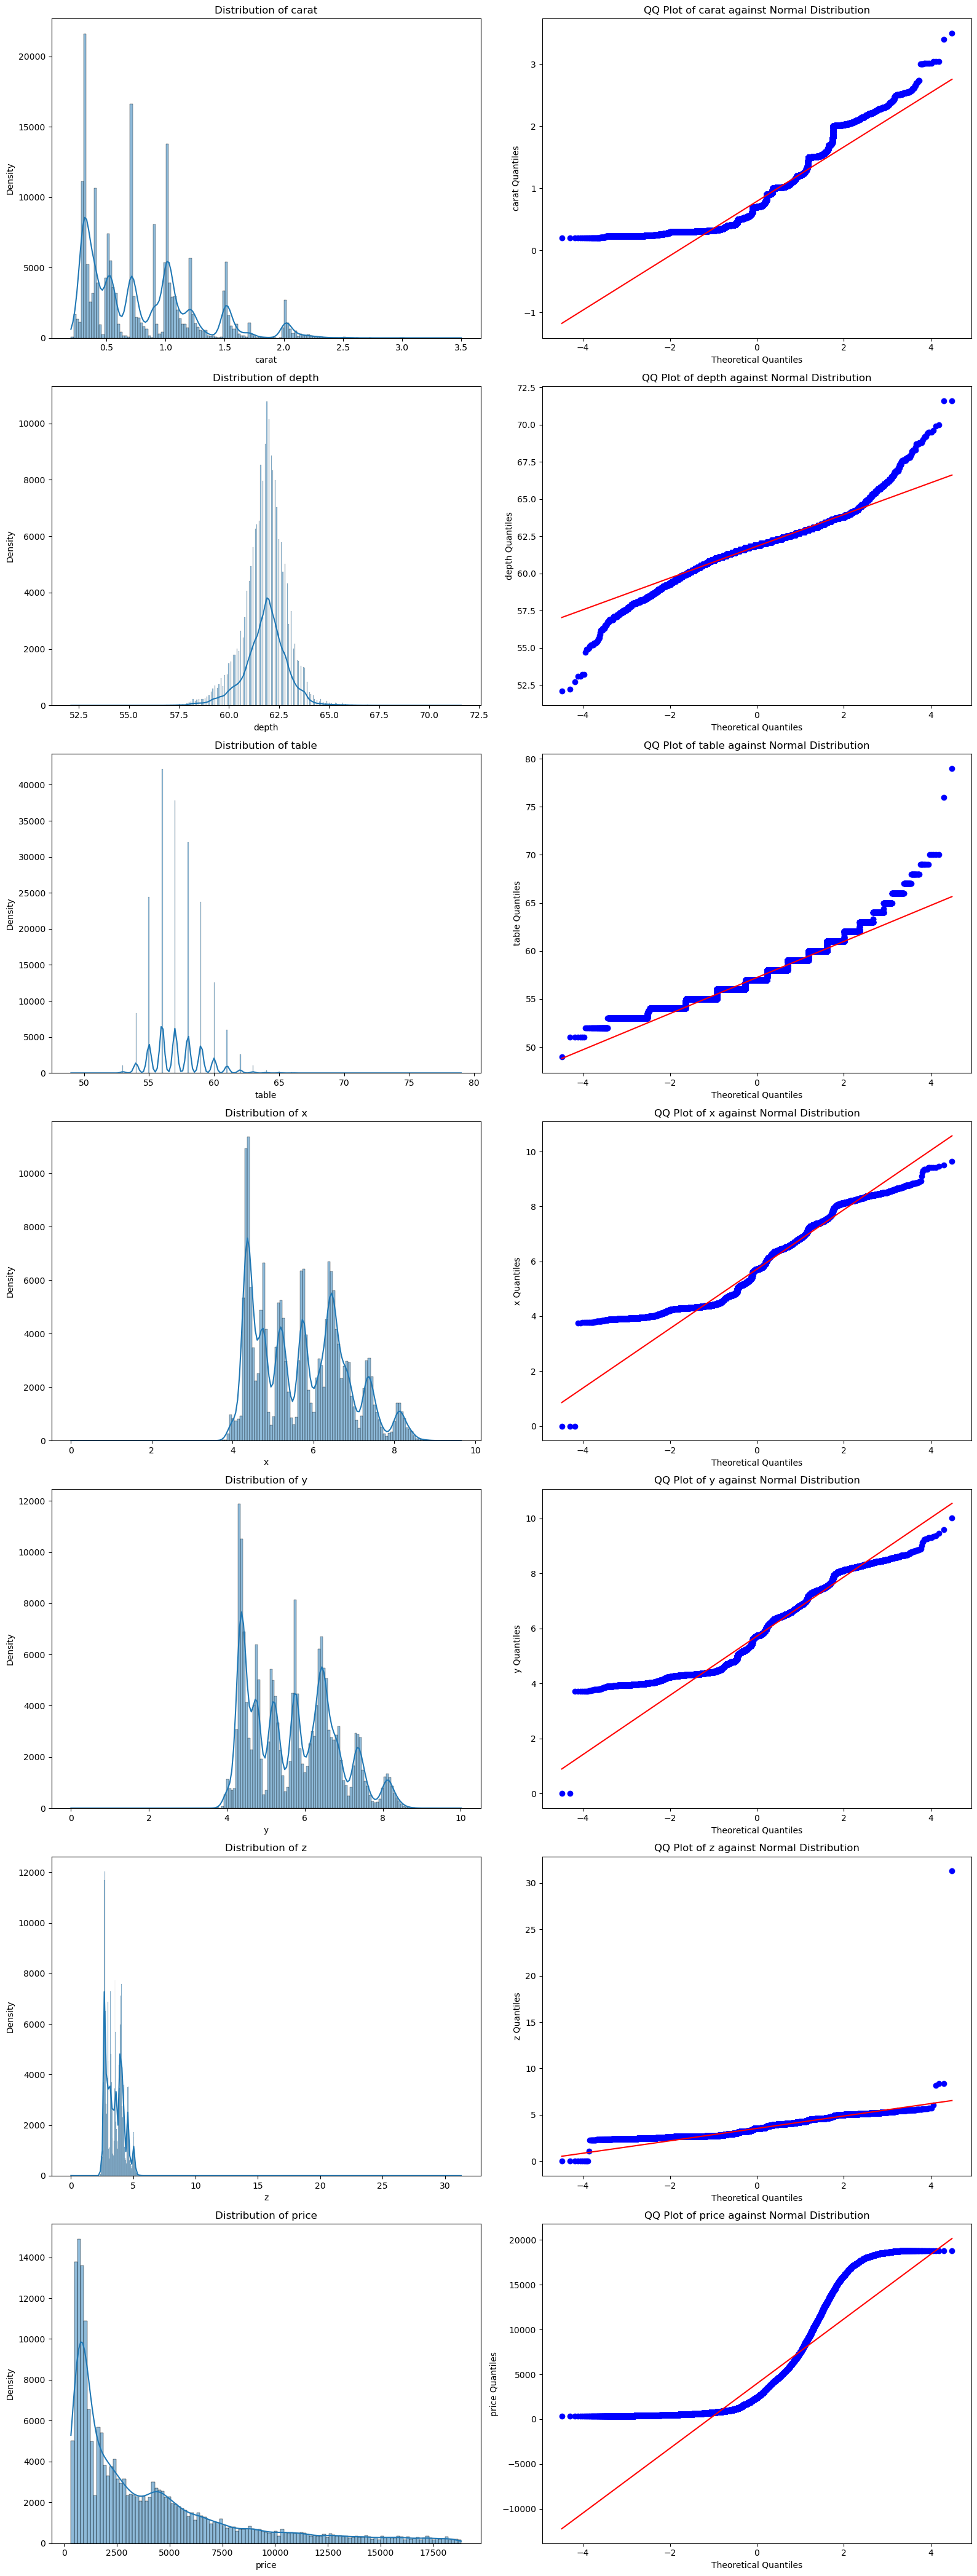

In [24]:
fig, axes = plt.subplots(nrows=len(num_col), ncols=2, figsize=(16, len(num_col) * 6))

for idx, col in enumerate(num_col):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Density')
    
    stats.probplot(df[col], dist="norm", plot=axes[idx, 1])
    axes[idx, 1].set_title(f'QQ Plot of {col} against Normal Distribution')
    axes[idx, 1].set_xlabel('Theoretical Quantiles')
    axes[idx, 1].set_ylabel(f'{col} Quantiles')

plt.tight_layout()
plt.show()

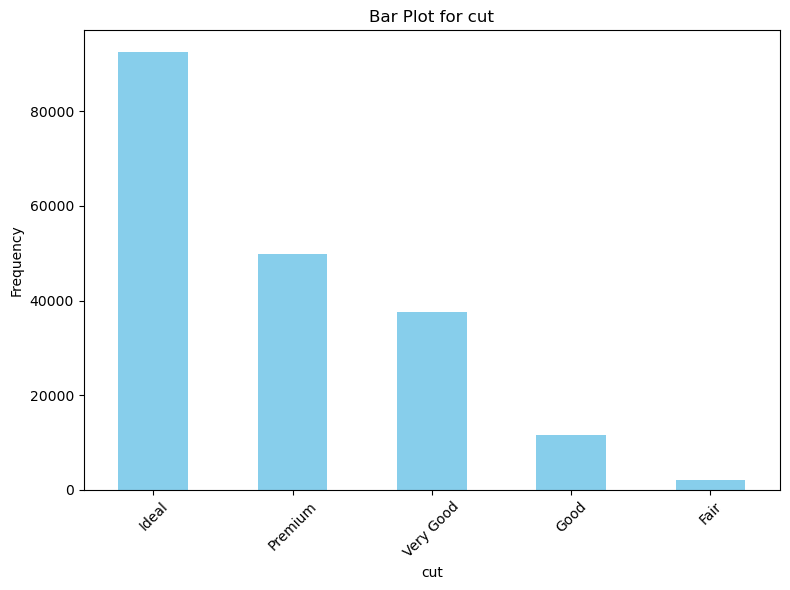

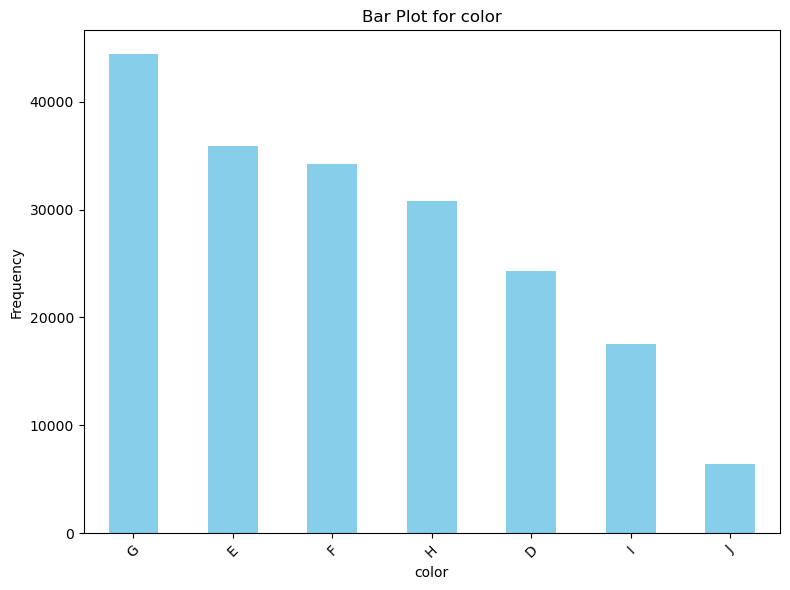

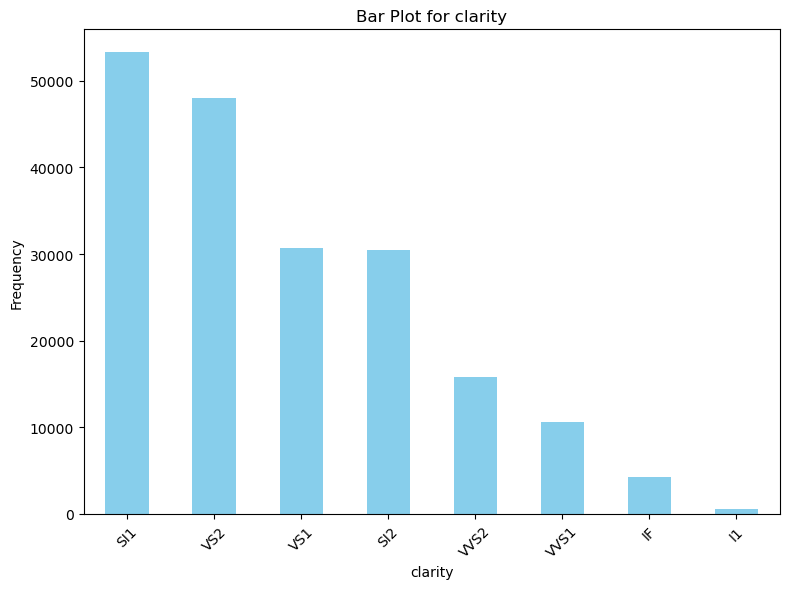

In [28]:
for col in cat_col:
    plt.figure(figsize=(8, 6))  
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

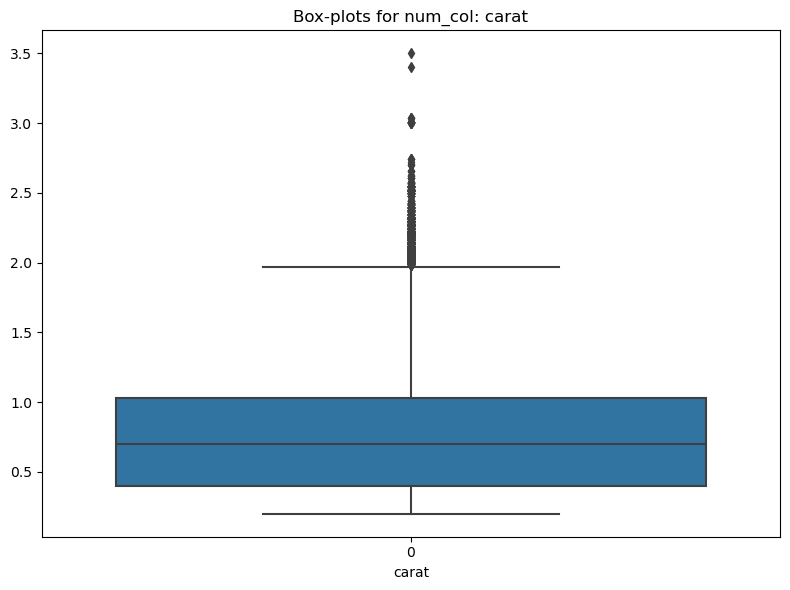

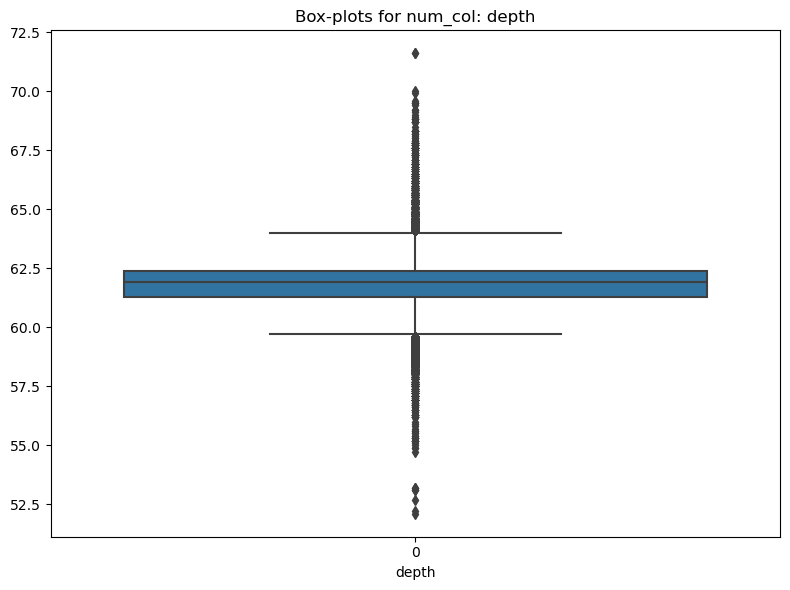

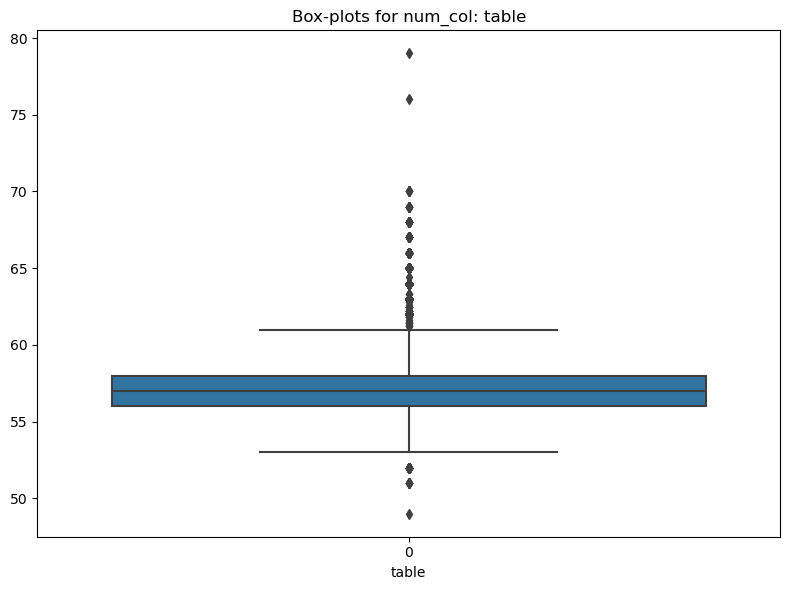

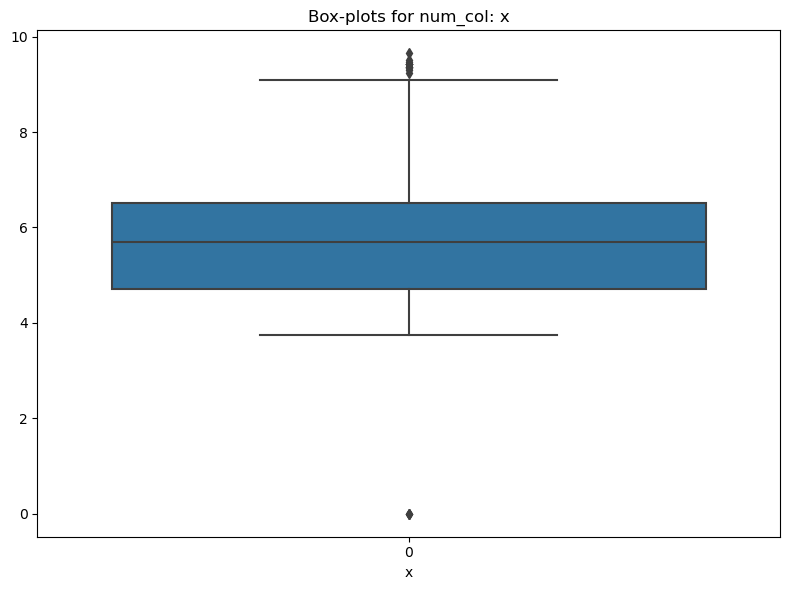

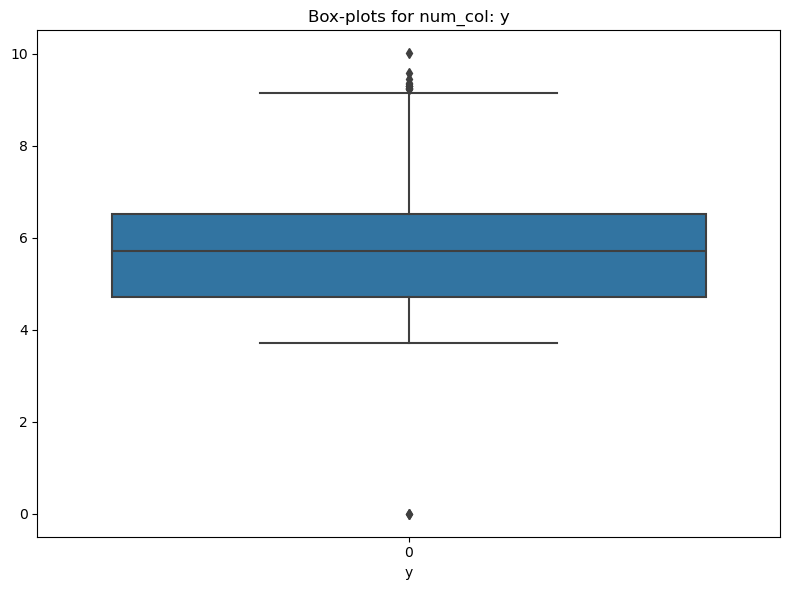

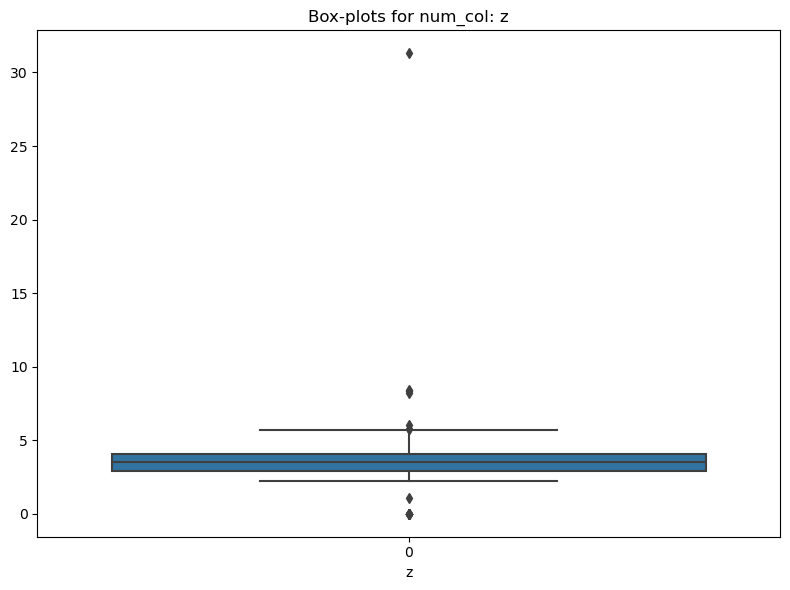

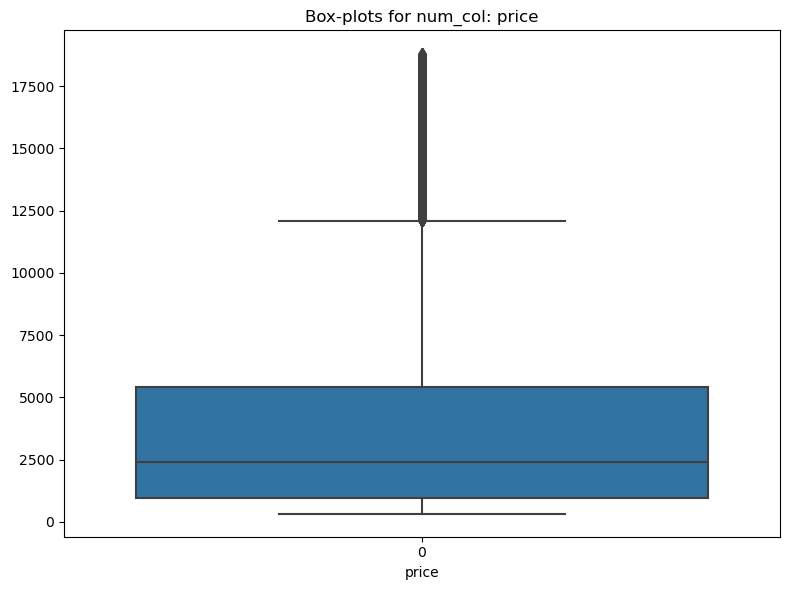

In [29]:
for i in num_col:
 plt.figure(figsize=(8,6))
 plt.title(f'Box-plots for num_col: {i}')
 sns.boxplot(data=df[i])
 plt.xlabel(f'{i}')
 plt.tight_layout()
 plt.show()
 
 
 

In [46]:
def remove_outlier(X,col):
    X_fil=X.copy()
    for i in col:
        iqr=(X[i].quantile(0.75)-X[i].quantile(0.25))
        u_lt=X[i].quantile(0.75) + 1.5*iqr
        l_lt=X[i].quantile(0.25) -1.5*iqr
        X_fil[i]=np.where(
            X_fil[i]>u_lt,
            u_lt,
            np.where(
                X_fil[i]<l_lt,
                l_lt,
                X_fil[i]
            )
        )
    return X_fil

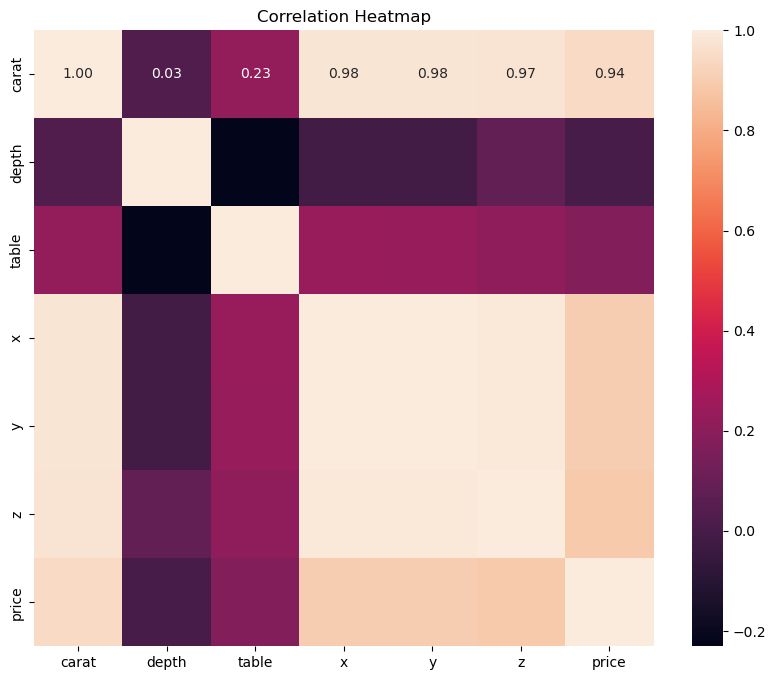

In [30]:
plt.figure(figsize=(10, 8))  
sns.heatmap(df[num_col].corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:
print(df['cut'].unique()," \n",df['color'].unique(),"\n ",df['clarity'].unique())

['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']  
 ['F' 'J' 'G' 'E' 'D' 'H' 'I'] 
  ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [32]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [33]:
df['cut']=df['cut'].map(cut_map)
df['color']=df['color'].map(color_map)
df['clarity']=df['clarity'].map(clarity_map)

In [34]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


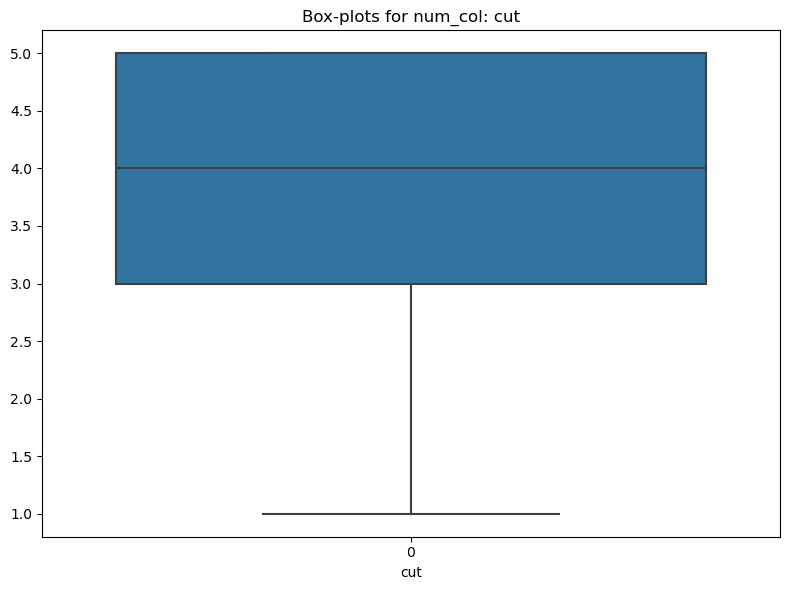

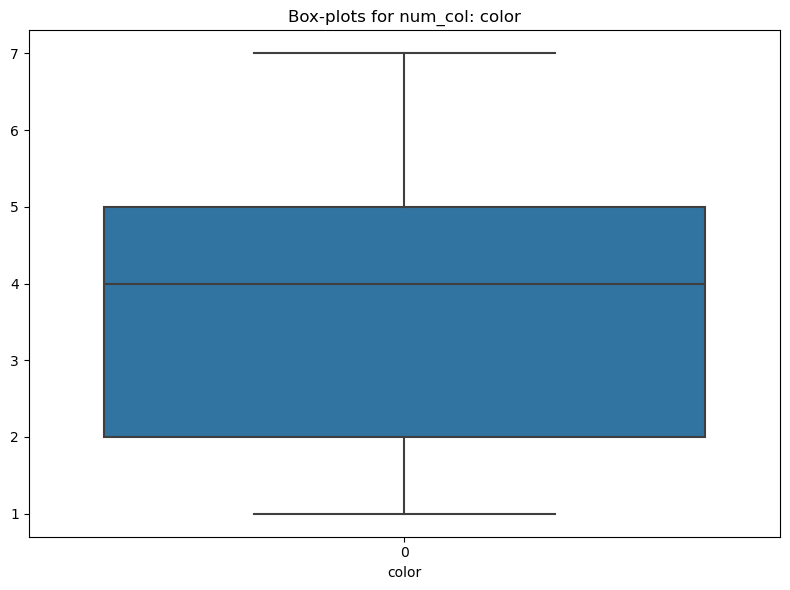

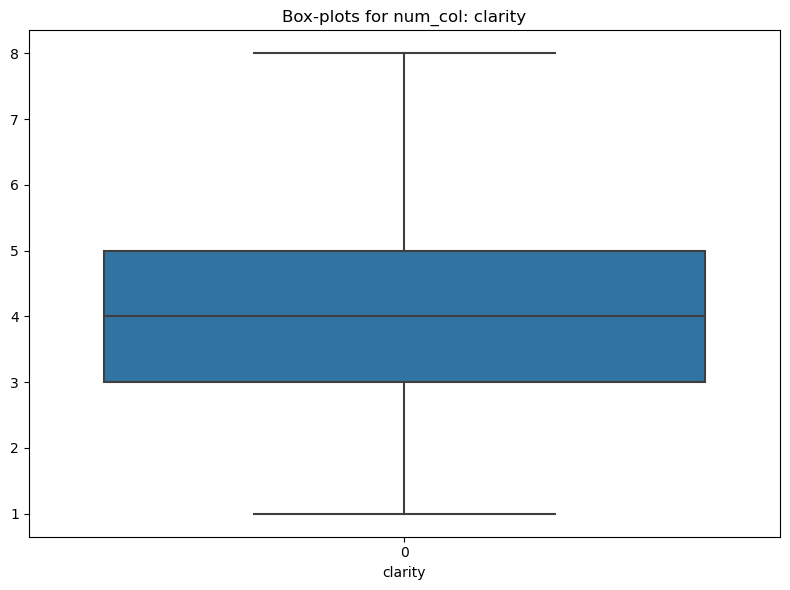

In [35]:
for i in cat_col:
 plt.figure(figsize=(8,6))
 plt.title(f'Box-plots for num_col: {i}')
 sns.boxplot(data=df[i])
 plt.xlabel(f'{i}')
 plt.tight_layout()
 plt.show()

In [37]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['price']),df['price'],test_size=0.3,random_state=30)

In [38]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
168192,0.34,5,6,6,60.9,57.0,4.56,4.53,2.76
35202,0.90,2,2,3,63.8,57.0,6.07,6.03,3.87
41091,1.02,4,4,5,62.7,58.0,6.35,6.39,4.00
31239,0.32,4,4,4,62.1,59.0,4.37,4.35,2.71
45722,0.35,5,7,6,61.1,56.0,4.53,4.57,2.78
...,...,...,...,...,...,...,...,...,...
66455,0.31,5,2,3,61.8,56.0,4.31,4.35,2.68
46220,1.25,5,4,2,62.0,56.0,6.88,6.95,4.28
98804,1.00,2,4,3,63.5,56.0,6.29,6.37,4.02
48045,1.10,5,4,5,59.9,60.0,6.68,6.77,4.01


In [39]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [43]:
X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=df.drop(columns=['price']).columns)
X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=df.drop(columns=['price']).columns)

In [44]:
X_train_scaled_df

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.975439,0.874076,1.528722,1.352731,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150
1,0.235195,-2.144558,-0.935071,-0.646786,1.833637,-0.121531,0.318447,0.279859,0.485354
2,0.494617,-0.132136,0.296826,0.686225,0.815855,0.399800,0.570855,0.606458,0.673737
3,-1.018676,-0.132136,0.296826,0.019720,0.260701,0.921131,-1.214034,-1.244270,-1.195605
4,-0.953821,0.874076,2.144670,1.352731,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168
...,...,...,...,...,...,...,...,...,...
135496,-1.040295,0.874076,-0.935071,-0.646786,-0.016876,-0.642862,-1.268122,-1.244270,-1.239078
135497,0.991842,0.874076,0.296826,-1.313292,0.168176,-0.642862,1.048629,1.114501,1.079486
135498,0.451380,-2.144558,0.296826,-0.646786,1.556060,-0.642862,0.516768,0.588314,0.702719
135499,0.667565,0.874076,0.296826,0.686225,-1.774863,1.442462,0.868337,0.951202,0.688228


In [49]:

new_X_train=remove_outlier(X_train_scaled_df,num_col.drop(labels='price'))

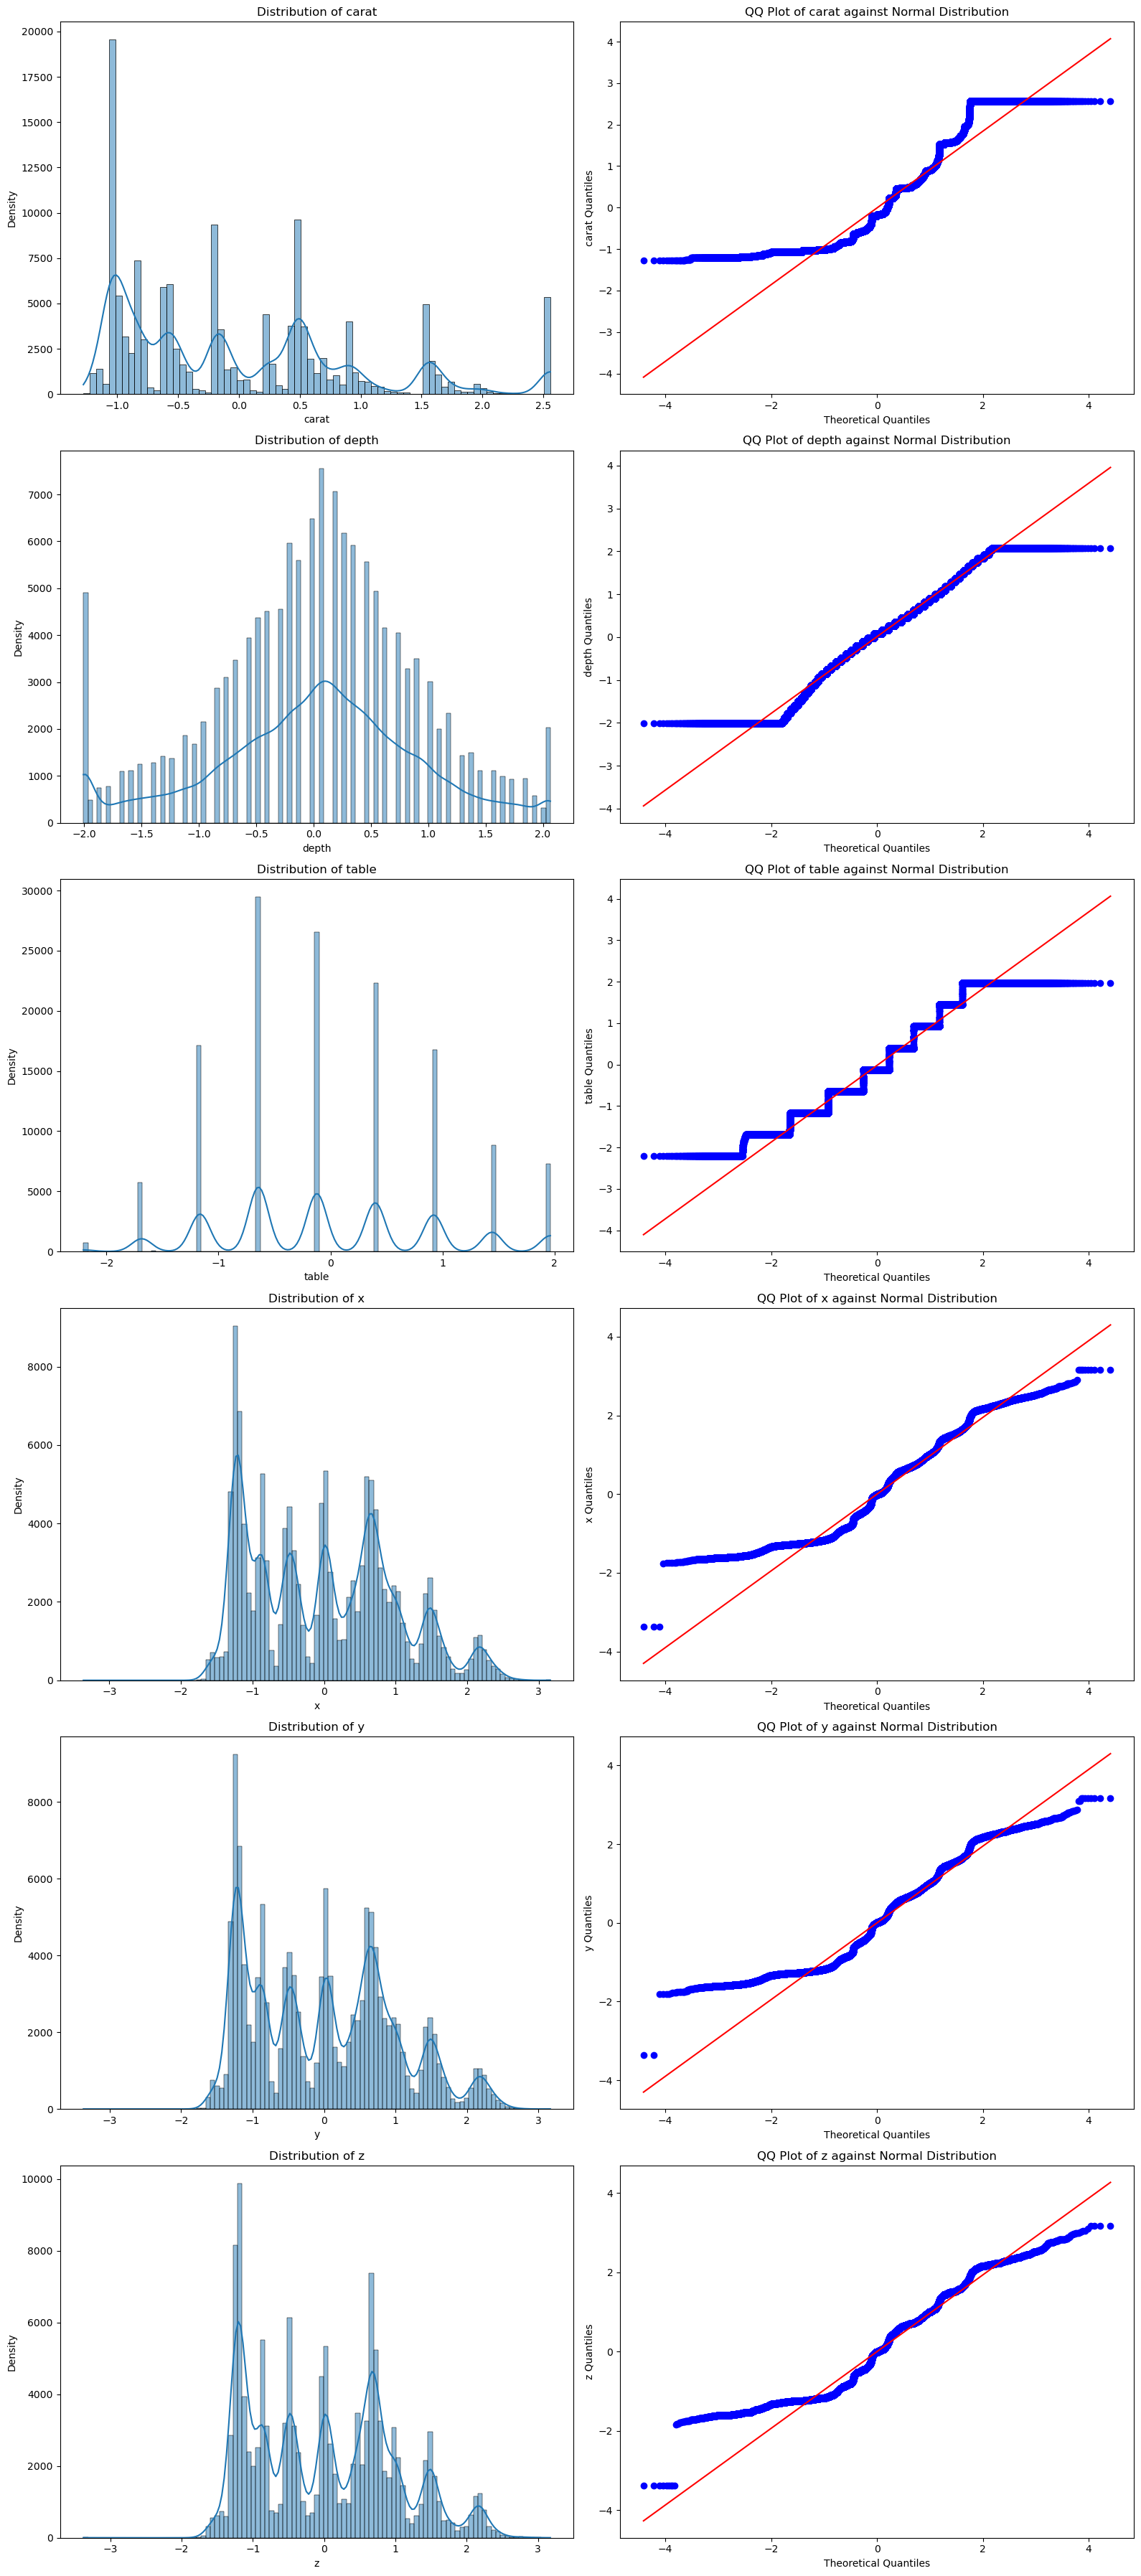

In [51]:
fig, axes = plt.subplots(nrows=len(num_col.drop(labels='price')), ncols=2, figsize=(16, len(num_col.drop(labels='price')) * 6))

for idx, col in enumerate(num_col.drop(labels='price')):
    sns.histplot(data=new_X_train, x=col, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Density')
    
    stats.probplot(new_X_train[col], dist="norm", plot=axes[idx, 1])
    axes[idx, 1].set_title(f'QQ Plot of {col} against Normal Distribution')
    axes[idx, 1].set_xlabel('Theoretical Quantiles')
    axes[idx, 1].set_ylabel(f'{col} Quantiles')

plt.tight_layout()
plt.show()

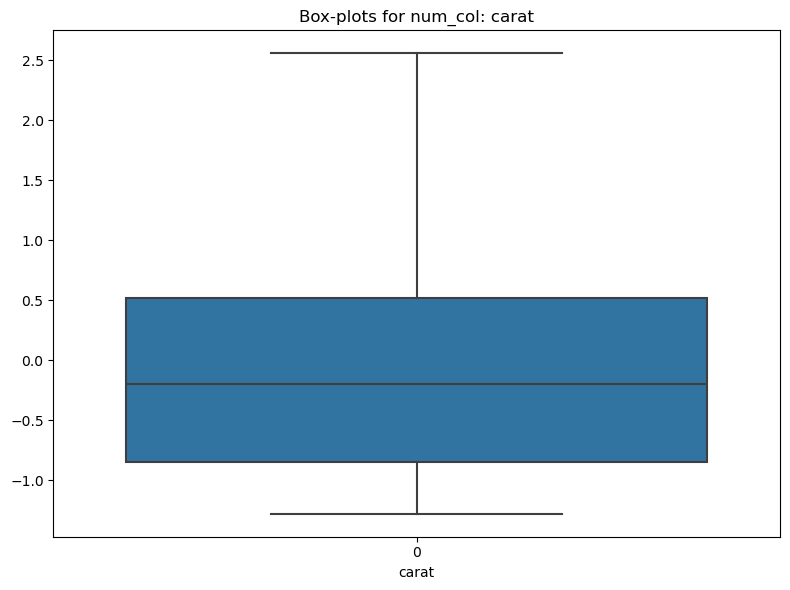

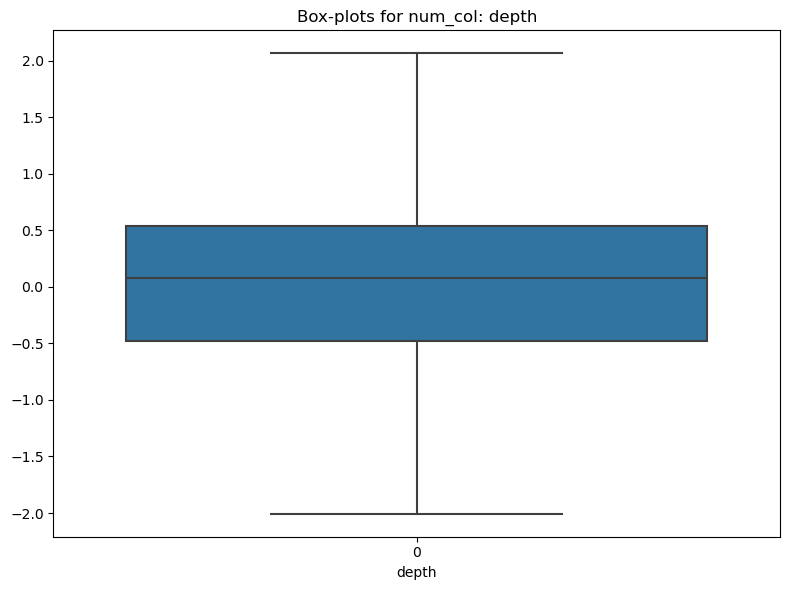

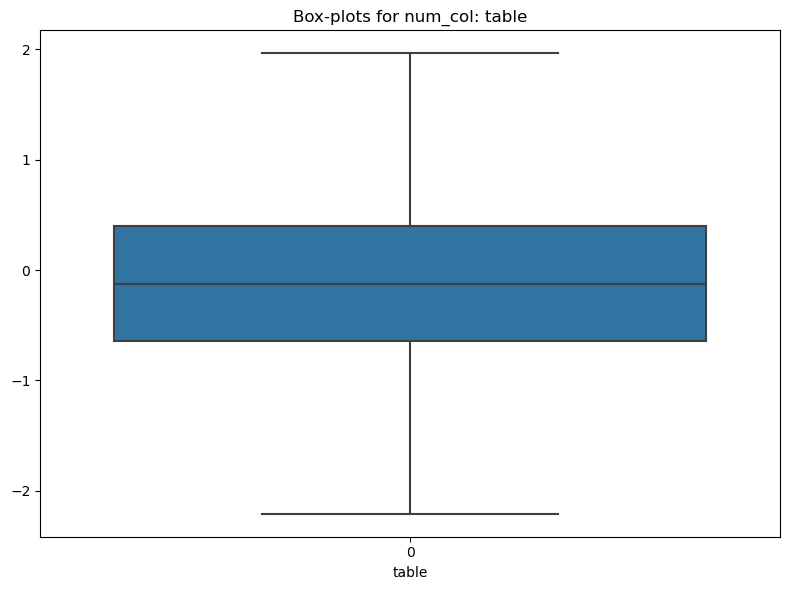

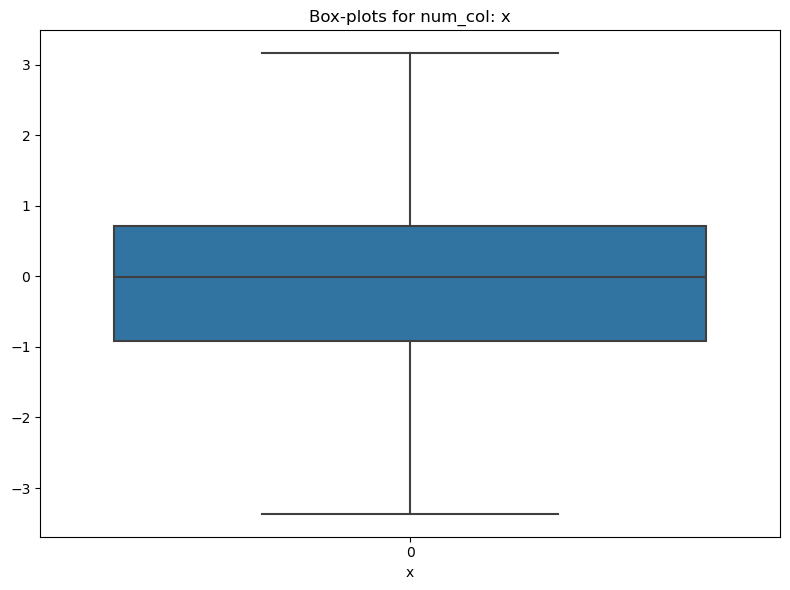

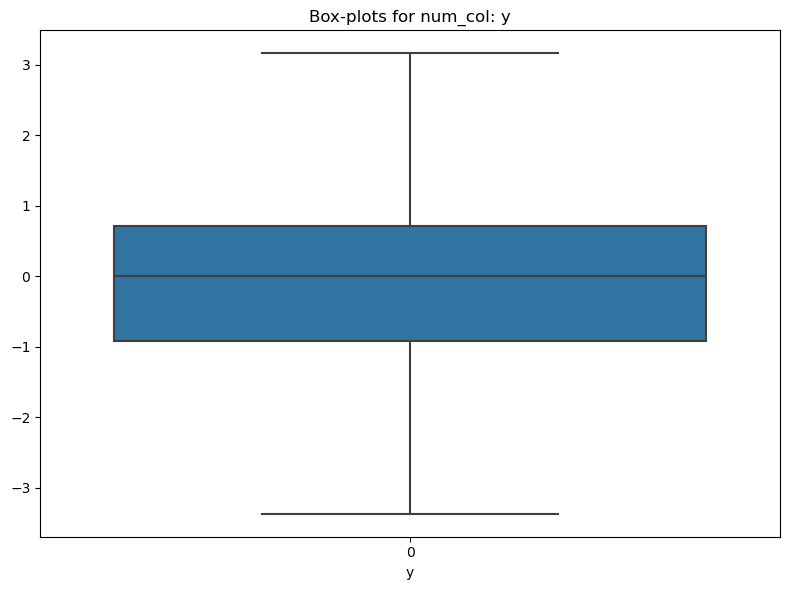

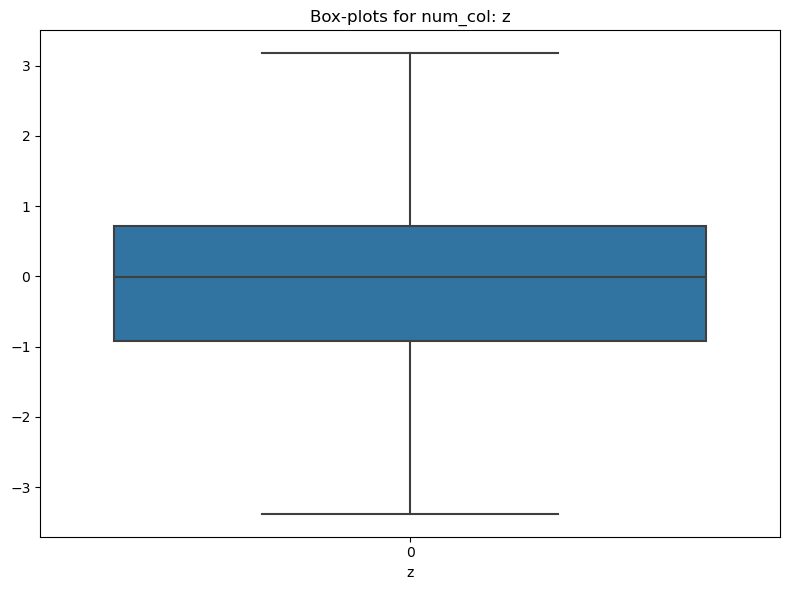

In [52]:
for i in num_col.drop(labels=['price']):
 plt.figure(figsize=(8,6))
 plt.title(f'Box-plots for num_col: {i}')
 sns.boxplot(data=new_X_train[i])
 plt.xlabel(f'{i}')
 plt.tight_layout()
 plt.show()

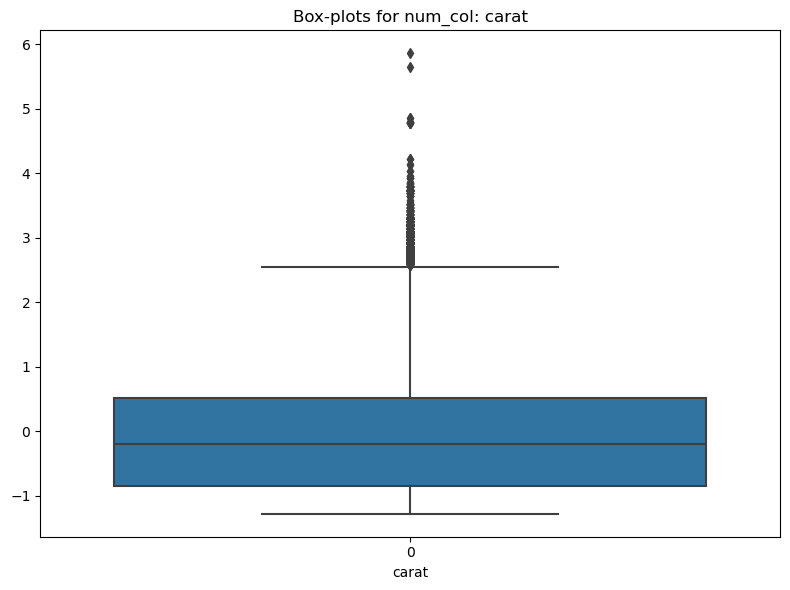

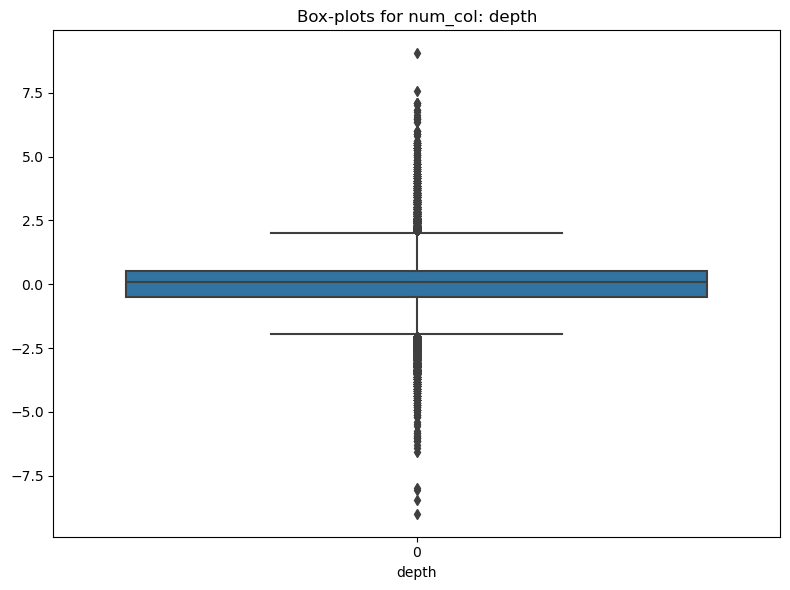

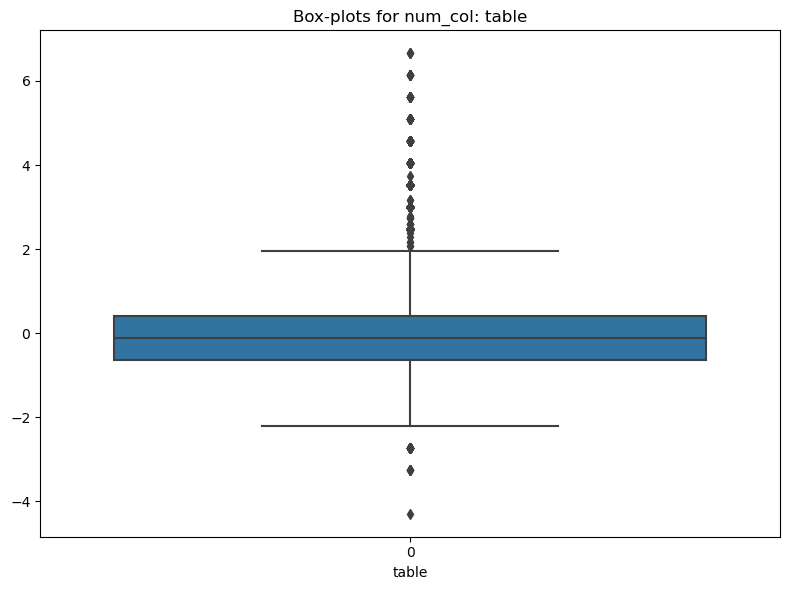

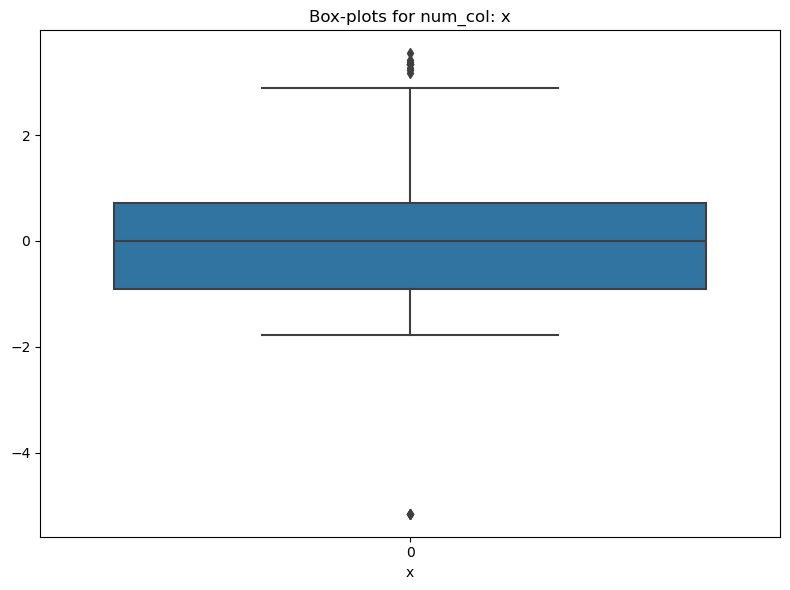

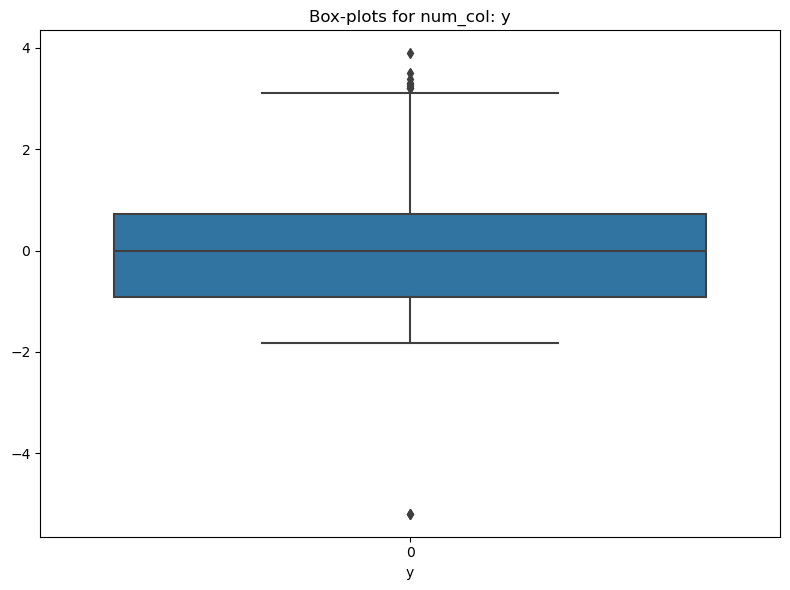

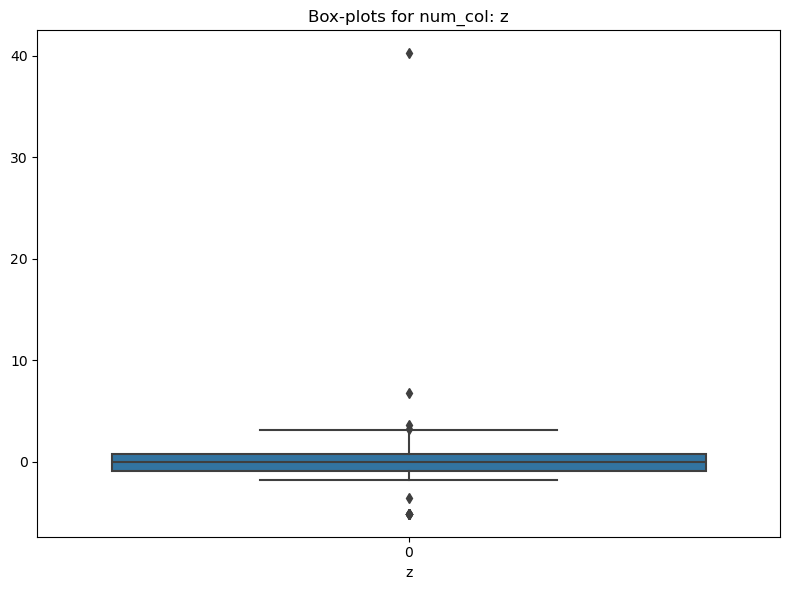

In [48]:
for i in num_col.drop(labels=['id','price']):
 plt.figure(figsize=(8,6))
 plt.title(f'Box-plots for num_col: {i}')
 sns.boxplot(data=X_train_scaled_df[i])
 plt.xlabel(f'{i}')
 plt.tight_layout()
 plt.show()

In [49]:
## No effect after Scaling on outliers

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  int64  
 3   color    193573 non-null  int64  
 4   clarity  193573 non-null  int64  
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 16.2 MB
